In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$ \beta = \theta - \frac{D_{LS}}{D_L D_S}\frac{4GM}{c^2\theta}  $$

$$\theta = \beta - \frac{\theta_E^2}{\theta} \rightarrow \beta = \theta + \frac{\theta_E^2}{\theta}$$

$$\theta_E = (\frac{4GM}{c^2}\frac{D_{LS}}{D_S D_L})^{\frac{1}{2}}$$

The quadratic solution for $\theta$: $\theta_{1,2} = \frac{1}{2}(\beta \pm \sqrt{\beta^2+4\theta_E^2} \space)$

In pixel space, $\beta$ is the coordinate distance: $\beta = \sqrt{(x-x_0)^2+(y-y_0)^2}$ where $(x_0, y_0)$ are the x,y coordinates of the point-mass lens.

In [2]:
#constants
G = 6.67408e-11*(1.99e30)*(3.4043726521e-68) #(MPc^3)/(M_sun s^2)
c = (2.99e+8)*(3.241e-23) #MPc/s 
def erad(Dl,Dls,M):
    #Dls = Distance from lens to source in MPc
    #Ds = Distance from observer to source in MPc
    #Dl = Distance from observer to lens in MPc
    #M = Mass of the lens in solar masses
    Ds = Dls + Dl
    y = ((((4*G*M)/(c**2.0))*(((Dls)/(Ds*Dl))))**0.5)*10000.0
    return y

In [3]:
def theta1(beta,erad):
    theta = 0.5*(beta + ((beta**2.0)+(4.0*(erad**2.0)))**0.5)
    return theta
def theta2(beta,erad):
    theta = 0.5*(beta - ((beta**2.0)+(4.0*(erad**2.0)))**0.5)
    return theta
def beta(x,y,xc,yc):
    #x = x coordinate
    #y = y coordinate
    #xc = x position of lens
    #yc = y position of lens
    B = (((x-xc)**2.0)+((y-yc)**2.0))**0.5
    return B

In [4]:
### CHOOSE LENSING PARAMETERS ###
Dl = 5.0 #Distance to lens in MPc
Dls = 5.0 #Distance from lens to source in MPc
M = 10.0e+15 #Mass of point-source lens in solar masses
xc = 0.0 #X center of lens
yc = 0.0 #Y center of lens
er = erad(Dl,Dls,M)

In [5]:
#source just outside Einstein radius
xsource1 = array(10.0*rand(100))-(er-50.0)
ysource1 = array(10.0*rand(100))+(er-50.0)
#source directly behind
xsource2= array(random.uniform(xc-10,xc+10,100))
ysource2 = array(random.uniform(xc-10,xc+10,100))

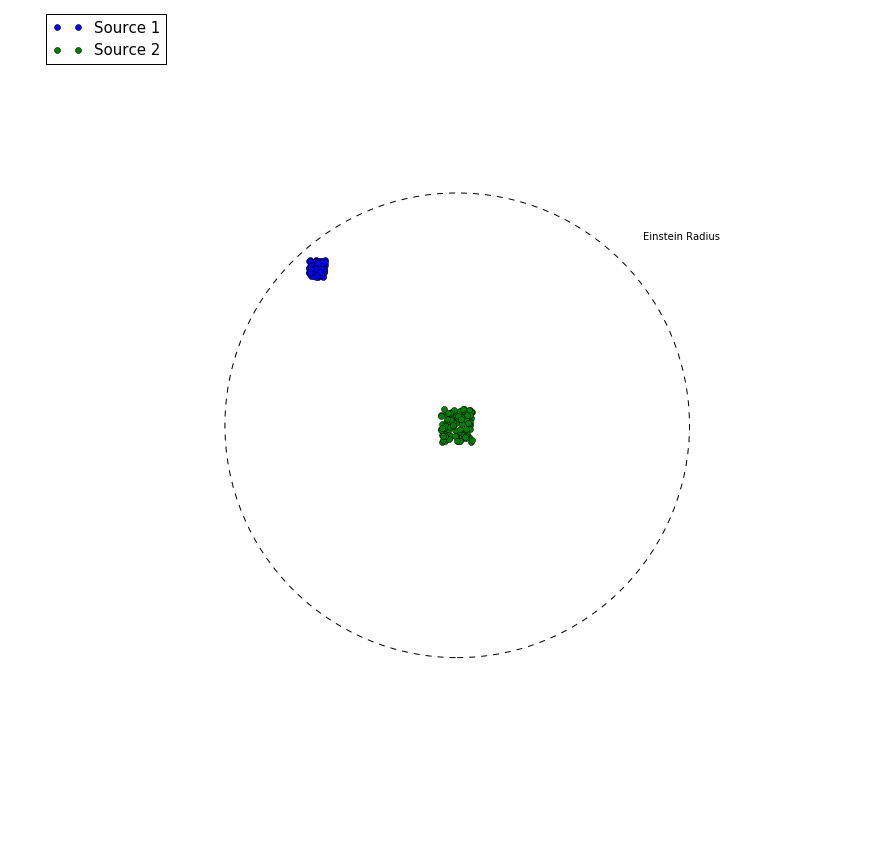

In [6]:
radius = plt.Circle((0,0),er,color='k',linestyle='--',fill=False)
fig,ax = subplots(1,1)
ax.add_artist(radius)
ax.axis('off')
ax.set_xlim(-250,250)
ax.set_ylim(-250,250)
ax.plot(xsource1,ysource1,linestyle="none",marker="o",label = "Source 1")
ax.plot(xsource2,ysource2,linestyle="none",marker="o",label="Source 2")
fig.set_size_inches(15,15)
ax.text((xc+0.8*er),(yc+0.8*er),"Einstein Radius",fontsize=10)
ax.legend(loc=2,fontsize=15);

Now each point in the source plane must be mapped to the oberver's plane using formulas for $\beta$ and $\theta$
If $\beta_{x,y}$ represents the pixel distance in the source plane in the x and y direction, and $\theta_{x^{'},y^{'}} $ represents the pixel distance in the observer plane in the same direction, then the coordinates in the observer's plane can be found from the expressions:
$$ x^{'} = \frac{\theta}{\beta}x  \space \space \space, \space \space y^{'} = \frac{\theta}{\beta}y$$
Because the solution for $\theta$ is quadratic, each point in the source plane will be mapped to two points in the observer's plane.

In [7]:
xo1 = []
xo2 = []
yo1 = []
yo2 = []

n=0
while (n<100):
    b = beta(xsource1[n],ysource1[n],0.0,0.0)
    t1 = theta1(b,er)
    t2 = theta2(b,er)
    x1 = (t1/b)*xsource1[n]
    x2 = (t2/b)*xsource1[n]
    y1 = (t1/b)*ysource1[n]
    y2 = (t2/b)*ysource1[n]
    xo1.append(x1)
    xo2.append(x2)
    yo1.append(y1)
    yo2.append(y2)
    n+=1

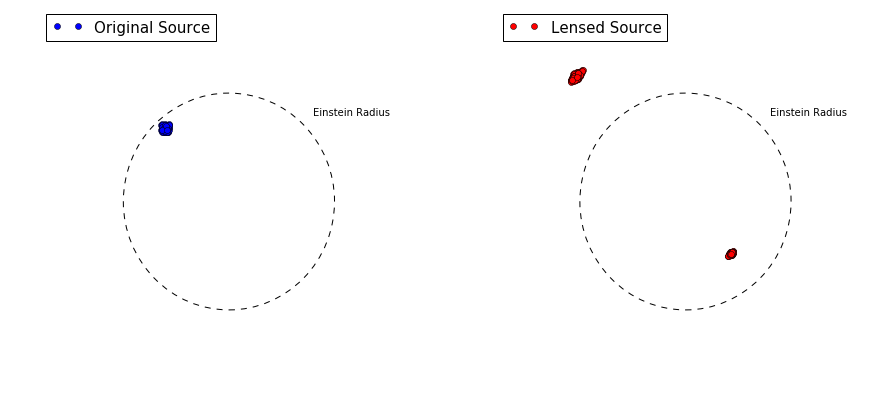

In [8]:
radius1 = plt.Circle((0,0),er,color='k',linestyle='--',fill=False)
radius2 = plt.Circle((0,0),er,color='k',linestyle='--',fill=False)
fig1,ax1 = subplots(1,2)
ax1[0].add_artist(radius1)
ax1[1].add_artist(radius2)
ax1[0].axis('off')
ax1[1].axis('off')
ax1[0].set_xlim(-250,250)
ax1[0].set_ylim(-250,250)
ax1[1].set_xlim(-250,250)
ax1[1].set_ylim(-250,250)
ax1[0].plot(xsource1,ysource1,linestyle="none",marker="o",label = "Original Source")
ax1[1].plot(xo1,yo1,linestyle="none",marker='o',color='r',label="Lensed Source")
ax1[1].plot(xo2,yo2,linestyle="none",marker='o',color='r')
fig1.set_size_inches(15,7)
ax1[0].text((xc+0.8*er),(yc+0.8*er),"Einstein Radius",fontsize=10)
ax1[1].text((xc+0.8*er),(yc+0.8*er),"Einstein Radius",fontsize=10)
ax1[0].legend(loc=2,fontsize=15);
ax1[1].legend(loc=2,fontsize=15);

In [9]:
xco1 = []
xco2 = []
yco1 = []
yco2 = []

m=0
while (m<100):
    b = beta(xsource2[m],ysource2[m],0.0,0.0)
    t1 = theta1(b,er)
    t2 = theta2(b,er)
    x1 = (t1/b)*xsource2[m]
    x2 = (t2/b)*xsource2[m]
    y1 = (t1/b)*ysource2[m]
    y2 = (t2/b)*ysource2[m]
    xco1.append(x1)
    xco2.append(x2)
    yco1.append(y1)
    yco2.append(y2)
    m+=1

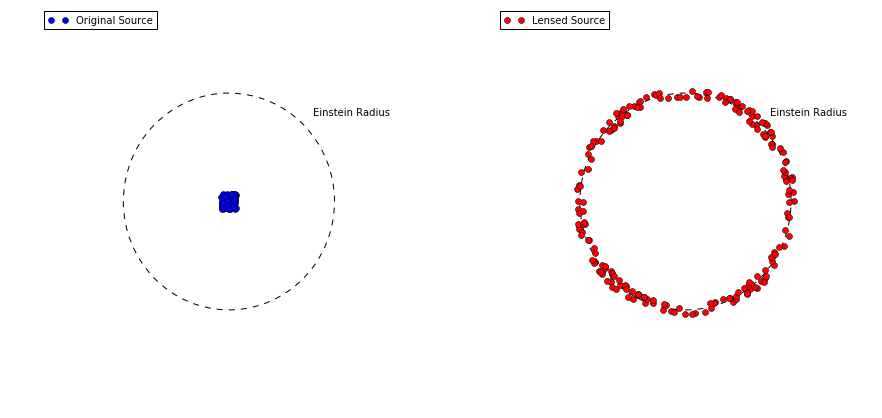

In [10]:
radius1 = plt.Circle((0,0),er,color='k',linestyle='--',fill=False)
radius2 = plt.Circle((0,0),er,color='k',linestyle='--',fill=False)
fig2,ax2 = subplots(1,2)
ax2[0].add_artist(radius1)
ax2[1].add_artist(radius2)
ax2[0].axis('off')
ax2[1].axis('off')
ax2[0].set_xlim(-250,250)
ax2[0].set_ylim(-250,250)
ax2[1].set_xlim(-250,250)
ax2[1].set_ylim(-250,250)
ax2[0].plot(xsource2,ysource2,linestyle="none",marker="o",label = "Original Source")
ax2[1].plot(xco1,yco1,linestyle="none",marker='o',color='r',label="Lensed Source")
ax2[1].plot(xco2,yco2,linestyle="none",marker='o',color='r')
fig2.set_size_inches(15,7)
ax2[0].text((xc+0.8*er),(yc+0.8*er),"Einstein Radius",fontsize=10)
ax2[1].text((xc+0.8*er),(yc+0.8*er),"Einstein Radius",fontsize=10)
ax2[0].legend(loc=2,fontsize=10)
ax2[1].legend(loc=2,fontsize=10);